# First Steps

Now that you have installed Marvin, it's time to take your first steps.  If you want to learn more about how Marvin works, then go see [General Info](https://api.sdss.org/doc/manga/marvin/refactor/general.html) to learn about Marvin Modes, Versions, or Downloading.  If you just want to play, then read on.

First let's run some boilerplate code for Python 2/3 compatibility and plotting in the notebook:

In [7]:
from __future__ import print_function, division, absolute_import
import matplotlib.pyplot as plt
%matplotlib inline

Now, let’s import Marvin:

In [8]:
import marvin

Let's see what MPL, DRP, and DAP versions we're using:

In [9]:
marvin.config.mplver, marvin.config.drpver, marvin.config.dapver

('MPL-3', 'v1_3_3', 'v1_0_0')

On intial import, Marvin will set the default data version to use as MPL-4. You can change the version of MaNGA data using the Marvin [Config](https://api.sdss.org/doc/manga/marvin/refactor/api/general.html#marvin-config-class).



In [12]:
from marvin import config
config.setMPL('MPL-3')

print('MPL:', config.mplver)
print('DRP:', config.drpver)
print('DAP:', config.dapver)

MPL: MPL-3
DRP: v1_3_3
DAP: v1_0_0


But let's work with MPL-4:

In [18]:
config.setMPL('MPL-4')

# check designated version
config.mplver

'MPL-4'

# My First Cube
Now let’s play with a Marvin Cube!

Import the Marvin-Tools Cube class:

In [20]:
from marvin.tools.cube import Cube

Let's load a cube from a local file. Start by specifying the full path and name of the file, such as:

`/Users/Brian/Work/Manga/redux/v1_5_1/8485/stack/manga-8485-1901-LOGCUBE.fits.gz`

**EDIT Next Cell**

In [23]:
#----- EDIT THIS CELL -----#

# filename = '/Users/Brian/Work/Manga/redux/v1_5_1/8485/stack/manga-8485-1901-LOGCUBE.fits.gz'
filename = 'path/to/manga/cube/manga-8485-1901-LOGCUBE.fits.gz'

filename = '/Users/andrews/manga/spectro/redux/v1_5_1/8485/stack/manga-8485-1901-LOGCUBE.fits.gz'

Create a Cube object:

In [25]:
cc = Cube(filename=filename)

Now we have a Cube object:

In [26]:
print(cc)

<Marvin Cube (plateifu='8485-1901', mode='local', data_origin='file')>


How about we look at some meta-data

In [27]:
cc.ra, cc.dec, cc.hdr['SRVYMODE']

(232.544703894, 48.6902009334, 'MaNGA dither')

...and the quality and target bits

In [29]:
cc.targetbit

{'bits': [2336L], 'names': ['MNGTRG1']}

In [31]:
cc.qualitybit

('DRP3QUAL', 1L, None)

## Get a Spaxel
Let's get spaxel (x=10, y=10):

In [33]:
spax = cc[10,10]

In [35]:
spax

<Marvin Spaxel (x=10, y=10)>

It has the wavelengths and fluxes of each spectral channel:

In [36]:
spax.drp.wavelength

array([  3621.59598486,   3622.42998417,   3623.26417553, ...,
        10349.03843826,  10351.42166679,  10353.80544415])

In [37]:
spax.drp.flux

array([-0.00318646,  0.00827731,  0.01482985, ...,  0.        ,
        0.        ,  0.        ], dtype=float32)

### Plot the spectrum!

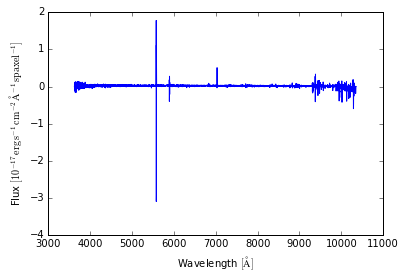

In [45]:
spax.drp.plot()

Save plot to Downloads directory:

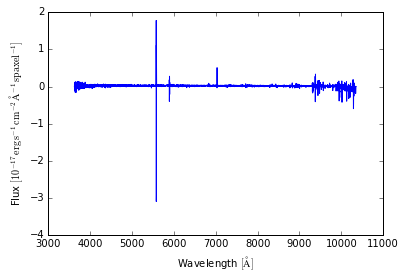

In [48]:
# To save the plot, we need to draw it in the same cell as the save command.
spax.drp.plot()

import os
plt.savefig(os.getenv('HOME') + '/Downloads/my-first-spectrum.png')